In [1]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
print("Importy zakończone pomyślnie!")

Importy zakończone pomyślnie!


In [3]:
df = pd.read_csv(r"C:\Users\piotr\OneDrive\Pulpit\projekty\flats_data\flats_12_03_2025_21_04.csv")
selected_districts = ["Ursus", "Bemowo", "Włochy"]
filtered_df = df[df["District"].isin(selected_districts)]

In [5]:
filtered_df = filtered_df[df["District"] != df["Street"]]
filtered_df

C:\Users\piotr\AppData\Local\Temp\ipykernel_7240\2554367153.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[df["District"] != df["Street"]]


,Unnamed: 0,link,City,District,Street,Meters,Floor,Rooms,Price
0,0,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-lo...,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000
4,4,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-po...,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000
5,5,/oferta/sprzedaz-mieszkanie-warszawa-ursus-edw...,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999
6,6,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-ge...,Warszawa,Bemowo,gen. Tadeusza Pełczyńskiego,74.0,3/5,3,1480000
14,14,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-sz...,Warszawa,Bemowo,Szlifierska,36.0,5/5,2,660000
...,...,...,...,...,...,...,...,...,...
2989,2989,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,45.0,1/6,2,736271
2990,2990,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060
2991,2991,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060
2992,2992,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066


In [5]:
filtered_df = filtered_df[df["District"] != df["Street"]]
filtered_df

C:\Users\piotr\AppData\Local\Temp\ipykernel_7240\2554367153.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[df["District"] != df["Street"]]


,Unnamed: 0,link,City,District,Street,Meters,Floor,Rooms,Price
0,0,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-lo...,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000
4,4,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-po...,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000
5,5,/oferta/sprzedaz-mieszkanie-warszawa-ursus-edw...,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999
6,6,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-ge...,Warszawa,Bemowo,gen. Tadeusza Pełczyńskiego,74.0,3/5,3,1480000
14,14,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-sz...,Warszawa,Bemowo,Szlifierska,36.0,5/5,2,660000
...,...,...,...,...,...,...,...,...,...
2989,2989,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,45.0,1/6,2,736271
2990,2990,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060
2991,2991,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060
2992,2992,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066


In [6]:
filtered_df = filtered_df.drop("Unnamed: 0", axis="columns")
filtered_df

,link,City,District,Street,Meters,Floor,Rooms,Price
0,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-lo...,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000
4,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-po...,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000
5,/oferta/sprzedaz-mieszkanie-warszawa-ursus-edw...,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999
6,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-ge...,Warszawa,Bemowo,gen. Tadeusza Pełczyńskiego,74.0,3/5,3,1480000
14,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-sz...,Warszawa,Bemowo,Szlifierska,36.0,5/5,2,660000
...,...,...,...,...,...,...,...,...
2989,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,45.0,1/6,2,736271
2990,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060
2991,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060
2992,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066


In [7]:
filtered_df["Level"] = filtered_df["Floor"].str.split("/").str[0]
filtered_df["Levels_in_bldg"] = filtered_df["Floor"].str.split("/").str[1]
filtered_df

,link,City,District,Street,Meters,Floor,Rooms,Price,Level,Levels_in_bldg
0,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-lo...,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000,3,4
4,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-po...,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000,10,11
5,/oferta/sprzedaz-mieszkanie-warszawa-ursus-edw...,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999,0,7
6,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-ge...,Warszawa,Bemowo,gen. Tadeusza Pełczyńskiego,74.0,3/5,3,1480000,3,5
14,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-sz...,Warszawa,Bemowo,Szlifierska,36.0,5/5,2,660000,5,5
...,...,...,...,...,...,...,...,...,...,...
2989,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,45.0,1/6,2,736271,1,6
2990,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6
2991,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6
2992,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066,1,6


In [8]:
filtered_df["price_per_meter"] = filtered_df["Price"]/filtered_df["Meters"]

In [9]:
filtered_df

,link,City,District,Street,Meters,Floor,Rooms,Price,Level,Levels_in_bldg,price_per_meter
0,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-lo...,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000,3,4,14865.671642
4,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-po...,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000,10,11,16619.718310
5,/oferta/sprzedaz-mieszkanie-warszawa-ursus-edw...,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999,0,7,16630.413043
6,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-ge...,Warszawa,Bemowo,gen. Tadeusza Pełczyńskiego,74.0,3/5,3,1480000,3,5,20000.000000
14,/oferta/sprzedaz-mieszkanie-warszawa-bemowo-sz...,Warszawa,Bemowo,Szlifierska,36.0,5/5,2,660000,5,5,18333.333333
...,...,...,...,...,...,...,...,...,...,...,...
2989,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,45.0,1/6,2,736271,1,6,16361.577778
2990,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,16020.000000
2991,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,16020.000000
2992,/oferta/sprzedaz-mieszkanie-warszawa-wlochy-ro...,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066,1,6,14076.757576


In [11]:
filtered_df = filtered_df.dropna()

In [13]:
filtered_df = filtered_df.drop("link", axis="columns")
filtered_df

,City,District,Street,Meters,Floor,Rooms,Price,Level,Levels_in_bldg,price_per_meter
0,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000,3,4,14865.671642
4,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000,10,11,16619.718310
5,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999,0,7,16630.413043
6,Warszawa,Bemowo,gen. Tadeusza Pełczyńskiego,74.0,3/5,3,1480000,3,5,20000.000000
14,Warszawa,Bemowo,Szlifierska,36.0,5/5,2,660000,5,5,18333.333333
...,...,...,...,...,...,...,...,...,...,...
2989,Warszawa,Włochy,Równoległa,45.0,1/6,2,736271,1,6,16361.577778
2990,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,16020.000000
2991,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,16020.000000
2992,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066,1,6,14076.757576


In [16]:
def create_geocoding_input(row):
    return f"{row['City']}, {row['District']}, {row['Street']}"
filtered_df["geocoding_input"] = filtered_df.apply(create_geocoding_input, axis = 1)
filtered_df
    

,City,District,Street,Meters,Floor,Rooms,Price,Level,Levels_in_bldg,price_per_meter,geocoding_input
0,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000,3,4,14865.671642,"Warszawa, Włochy, Łopuszańska"
4,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000,10,11,16619.718310,"Warszawa, Bemowo, Powstańców Śląskich"
5,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999,0,7,16630.413043,"Warszawa, Ursus, Edwarda Habicha"
6,Warszawa,Bemowo,gen. Tadeusza Pełczyńskiego,74.0,3/5,3,1480000,3,5,20000.000000,"Warszawa, Bemowo, gen. Tadeusza Pełczyńskiego"
14,Warszawa,Bemowo,Szlifierska,36.0,5/5,2,660000,5,5,18333.333333,"Warszawa, Bemowo, Szlifierska"
...,...,...,...,...,...,...,...,...,...,...,...
2989,Warszawa,Włochy,Równoległa,45.0,1/6,2,736271,1,6,16361.577778,"Warszawa, Włochy, Równoległa"
2990,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,16020.000000,"Warszawa, Włochy, Równoległa"
2991,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,16020.000000,"Warszawa, Włochy, Równoległa"
2992,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066,1,6,14076.757576,"Warszawa, Włochy, Równoległa"


In [19]:
first_five_rows = filtered_df.iloc[:5]
first_five_rows

,City,District,Street,Meters,Floor,Rooms,Price,Level,Levels_in_bldg,price_per_meter,geocoding_input
0,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000,3,4,14865.671642,"Warszawa, Włochy, Łopuszańska"
4,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000,10,11,16619.718310,"Warszawa, Bemowo, Powstańców Śląskich"
5,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999,0,7,16630.413043,"Warszawa, Ursus, Edwarda Habicha"
6,Warszawa,Bemowo,gen. Tadeusza Pełczyńskiego,74.0,3/5,3,1480000,3,5,20000.000000,"Warszawa, Bemowo, gen. Tadeusza Pełczyńskiego"
14,Warszawa,Bemowo,Szlifierska,36.0,5/5,2,660000,5,5,18333.333333,"Warszawa, Bemowo, Szlifierska"


In [26]:
import requests
import urllib.parse
all_inputs = {}
def get_all_streets(row):
    global all_inputs
    if row["geocoding_input"] not in all_inputs:
        all_inputs[row["geocoding_input"]] = {}
filtered_df.apply(get_all_streets, axis=1)
all_inputs

{'Warszawa, Włochy, Łopuszańska': {},
 'Warszawa, Bemowo, Powstańców Śląskich': {},
 'Warszawa, Ursus, Edwarda Habicha': {},
 'Warszawa, Bemowo, gen. Tadeusza Pełczyńskiego': {},
 'Warszawa, Bemowo, Szlifierska': {},
 'Warszawa, Bemowo, Karabeli': {},
 'Warszawa, Bemowo, Jerzego Waldorffa': {},
 'Warszawa, Bemowo, Synów Pułku': {},
 'Warszawa, Włochy, 1 Sierpnia': {},
 'Warszawa, Ursus, Konińska': {},
 'Warszawa, Ursus, Giserska': {},
 'Warszawa, Włochy, Komitetu Obrony Robotników': {},
 'Warszawa, Włochy, Szybowcowa': {},
 'Warszawa, Bemowo, Edmunda Jana Osmańczyka': {},
 'Warszawa, Włochy, Potrzebna': {},
 'Warszawa, Bemowo, Dębicka': {},
 'Warszawa, Włochy, Wilczycka': {},
 'Warszawa, Bemowo, Szeligowska': {},
 'Warszawa, Bemowo, Dywizjonu 303': {},
 'Warszawa, Włochy, Obywatelska': {},
 'Warszawa, Bemowo, gen. Meriana C. Coopera': {},
 'Warszawa, Bemowo, Górczewska': {},
 'Warszawa, Bemowo, Obrońców Tobruku': {},
 'Warszawa, Bemowo, Witolda Doroszewskiego': {},
 'Warszawa, Włochy, 

In [36]:
def get_geocoords_from_geoinput(geoinput):
    encoded_input = urllib.parse.quote(geoinput)
    api_key = "secret"
    req_adress = f"https://maps.googleapis.com/maps/api/geocode/json?key={api_key}&address={encoded_input}"
    response = requests.get(req_adress)
    data = response.json()
    bounds_ne_lat = data["results"][0]["geometry"]["bounds"]["northeast"]["lat"]
    bounds_ne_lng = data["results"][0]["geometry"]["bounds"]["northeast"]["lng"]
    bounds_sw_lat = data["results"][0]["geometry"]["bounds"]["southwest"]["lat"]
    bounds_sw_lng = data["results"][0]["geometry"]["bounds"]["southwest"]["lng"]
    center_lat = data["results"][0]["geometry"]["location"]["lat"]
    center_lng = data["results"][0]["geometry"]["location"]["lng"]
    returned_dict = {"bounds_ne_lat": bounds_ne_lat, "bounds_ne_lng": bounds_ne_lng, "bounds_sw_lat": bounds_sw_lat, "bounds_sw_lng": bounds_sw_lng, "center_lat": center_lat, "center_lng": center_lng}
    return returned_dict


In [37]:
for geoinput in all_inputs.keys():
    all_inputs[geoinput] = get_geocoords_from_geoinput(geoinput)
all_inputs

{'Warszawa, Włochy, Łopuszańska': {'bounds_ne_lat': 52.1979146,
  'bounds_ne_lng': 20.9588757,
  'bounds_sw_lat': 52.1891569,
  'bounds_sw_lng': 20.9237339,
  'center_lat': 52.1935787,
  'center_lng': 20.9411611},
 'Warszawa, Bemowo, Powstańców Śląskich': {'bounds_ne_lat': 52.26936509999999,
  'bounds_ne_lng': 20.9335872,
  'bounds_sw_lat': 52.219092,
  'bounds_sw_lng': 20.9067882,
  'center_lat': 52.2438169,
  'center_lng': 20.912364},
 'Warszawa, Ursus, Edwarda Habicha': {'bounds_ne_lat': 52.2069997,
  'bounds_ne_lng': 20.8829003,
  'bounds_sw_lat': 52.2020492,
  'bounds_sw_lng': 20.8781612,
  'center_lat': 52.204589,
  'center_lng': 20.8807535},
 'Warszawa, Bemowo, gen. Tadeusza Pełczyńskiego': {'bounds_ne_lat': 52.2458268,
  'bounds_ne_lng': 20.9130047,
  'bounds_sw_lat': 52.2411358,
  'bounds_sw_lng': 20.8973033,
  'center_lat': 52.243441,
  'center_lng': 20.9075295},
 'Warszawa, Bemowo, Szlifierska': {'bounds_ne_lat': 52.2446201,
  'bounds_ne_lng': 20.921568,
  'bounds_sw_lat': 5

In [42]:
def add_geocoding_column(row):
    geocoding_data = all_inputs.get(row["geocoding_input"], {})
    return pd.Series({
        'bounds_ne_lat': geocoding_data.get('bounds_ne_lat', None),
        'bounds_ne_lng': geocoding_data.get('bounds_ne_lng', None),
        'bounds_sw_lat': geocoding_data.get('bounds_sw_lat', None),
        'bounds_sw_lng': geocoding_data.get('bounds_sw_lng', None),
        'center_lat': geocoding_data.get('center_lat', None),
        'center_lng': geocoding_data.get('center_lng', None)
    })
final_df = filtered_df.join(filtered_df.apply(add_geocoding_column, axis=1))
final_df

,City,District,Street,Meters,Floor,Rooms,Price,Level,Levels_in_bldg,price_per_meter,geocoding_input,bounds_ne_lat,bounds_ne_lng,bounds_sw_lat,bounds_sw_lng,center_lat,center_lng
0,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000,3,4,14865.671642,"Warszawa, Włochy, Łopuszańska",52.197915,20.958876,52.189157,20.923734,52.193579,20.941161
4,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000,10,11,16619.718310,"Warszawa, Bemowo, Powstańców Śląskich",52.269365,20.933587,52.219092,20.906788,52.243817,20.912364
5,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999,0,7,16630.413043,"Warszawa, Ursus, Edwarda Habicha",52.207000,20.882900,52.202049,20.878161,52.204589,20.880754
6,Warszawa,Bemowo,gen. Tadeusza Pełczyńskiego,74.0,3/5,3,1480000,3,5,20000.000000,"Warszawa, Bemowo, gen. Tadeusza Pełczyńskiego",52.245827,20.913005,52.241136,20.897303,52.243441,20.907529
14,Warszawa,Bemowo,Szlifierska,36.0,5/5,2,660000,5,5,18333.333333,"Warszawa, Bemowo, Szlifierska",52.244620,20.921568,52.241876,20.920617,52.243254,20.920978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,Warszawa,Włochy,Równoległa,45.0,1/6,2,736271,1,6,16361.577778,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525
2990,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,16020.000000,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525
2991,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,16020.000000,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525
2992,Warszawa,Włochy,Równoległa,66.0,1/6,3,929066,1,6,14076.757576,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525


In [43]:
final_df = final_df.drop_duplicates()
final_df

,City,District,Street,Meters,Floor,Rooms,Price,Level,Levels_in_bldg,price_per_meter,geocoding_input,bounds_ne_lat,bounds_ne_lng,bounds_sw_lat,bounds_sw_lng,center_lat,center_lng
0,Warszawa,Włochy,Łopuszańska,67.0,3/4,3,996000,3,4,14865.671642,"Warszawa, Włochy, Łopuszańska",52.197915,20.958876,52.189157,20.923734,52.193579,20.941161
4,Warszawa,Bemowo,Powstańców Śląskich,71.0,10/11,3,1180000,10,11,16619.718310,"Warszawa, Bemowo, Powstańców Śląskich",52.269365,20.933587,52.219092,20.906788,52.243817,20.912364
5,Warszawa,Ursus,Edwarda Habicha,46.0,0/7,2,764999,0,7,16630.413043,"Warszawa, Ursus, Edwarda Habicha",52.207000,20.882900,52.202049,20.878161,52.204589,20.880754
6,Warszawa,Bemowo,gen. Tadeusza Pełczyńskiego,74.0,3/5,3,1480000,3,5,20000.000000,"Warszawa, Bemowo, gen. Tadeusza Pełczyńskiego",52.245827,20.913005,52.241136,20.897303,52.243441,20.907529
14,Warszawa,Bemowo,Szlifierska,36.0,5/5,2,660000,5,5,18333.333333,"Warszawa, Bemowo, Szlifierska",52.244620,20.921568,52.241876,20.920617,52.243254,20.920978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,Warszawa,Włochy,Lechicka,76.0,0/2,3,1123000,0,2,14776.315789,"Warszawa, Włochy, Lechicka",52.193394,20.970287,52.189689,20.960673,52.192024,20.965181
1149,Warszawa,Włochy,Notecka,59.0,0/1,2,595000,0,1,10084.745763,"Warszawa, Włochy, Notecka",52.212448,20.906697,52.211548,20.897901,52.211977,20.902378
1152,Warszawa,Włochy,Równoległa,45.0,1/6,2,736271,1,6,16361.577778,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525
1154,Warszawa,Włochy,Równoległa,53.0,5/6,3,849060,5,6,16020.000000,"Warszawa, Włochy, Równoległa",52.201154,20.947524,52.194353,20.936085,52.198017,20.940525


In [46]:
from sklearn.model_selection import train_test_split
X = final_df[["Meters", "Rooms", "Level", "Levels_in_bldg", "bounds_ne_lat", "bounds_ne_lng", "bounds_sw_lat", "bounds_sw_lng", "center_lat", "center_lng"]]
y = final_df["price_per_meter"]
X

,Meters,Rooms,Level,Levels_in_bldg,bounds_ne_lat,bounds_ne_lng,bounds_sw_lat,bounds_sw_lng,center_lat,center_lng
0,67.0,3,3,4,52.197915,20.958876,52.189157,20.923734,52.193579,20.941161
4,71.0,3,10,11,52.269365,20.933587,52.219092,20.906788,52.243817,20.912364
5,46.0,2,0,7,52.207000,20.882900,52.202049,20.878161,52.204589,20.880754
6,74.0,3,3,5,52.245827,20.913005,52.241136,20.897303,52.243441,20.907529
14,36.0,2,5,5,52.244620,20.921568,52.241876,20.920617,52.243254,20.920978
...,...,...,...,...,...,...,...,...,...,...
1145,76.0,3,0,2,52.193394,20.970287,52.189689,20.960673,52.192024,20.965181
1149,59.0,2,0,1,52.212448,20.906697,52.211548,20.897901,52.211977,20.902378
1152,45.0,2,1,6,52.201154,20.947524,52.194353,20.936085,52.198017,20.940525
1154,53.0,3,5,6,52.201154,20.947524,52.194353,20.936085,52.198017,20.940525


In [47]:
y

0       14865.671642
4       16619.718310
5       16630.413043
6       20000.000000
14      18333.333333
            ...     
1145    14776.315789
1149    10084.745763
1152    16361.577778
1154    16020.000000
1156    14076.757576
Name: price_per_meter, Length: 647, dtype: float64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

,Meters,Rooms,Level,Levels_in_bldg,bounds_ne_lat,bounds_ne_lng,bounds_sw_lat,bounds_sw_lng,center_lat,center_lng
313,41.0,2,0,7,52.209296,20.889538,52.197832,20.878643,52.203734,20.884012
1096,57.0,3,0,6,52.206195,20.944696,52.176432,20.917949,52.191396,20.927935
80,39.0,2,8,8,52.207000,20.882900,52.202049,20.878161,52.204589,20.880754
706,58.0,2,2,3,52.266570,20.904534,52.248797,20.895463,52.257759,20.897714
358,47.0,2,8,8,52.232419,20.914861,52.231071,20.909629,52.231427,20.912378
...,...,...,...,...,...,...,...,...,...,...
53,72.0,3,5,5,52.210525,20.892222,52.210263,20.891458,52.210428,20.891951
657,47.0,2,2,4,52.206490,20.911663,52.204204,20.904051,52.205435,20.908673
131,51.0,2,1,6,52.199806,20.914189,52.181887,20.903716,52.192209,20.908197
473,117.0,3,0,3,52.269365,20.933587,52.219092,20.906788,52.243817,20.912364


In [51]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 4)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.40552661575238347

In [52]:
model.score(X_test, y_test)

0.26567226224025053

In [53]:
model.feature_importances_

array([0.23389826, 0.01112996, 0.02269703, 0.12624298, 0.09200557,
       0.16169058, 0.06477425, 0.08059153, 0.08671413, 0.12025573])

<BarContainer object of 10 artists>

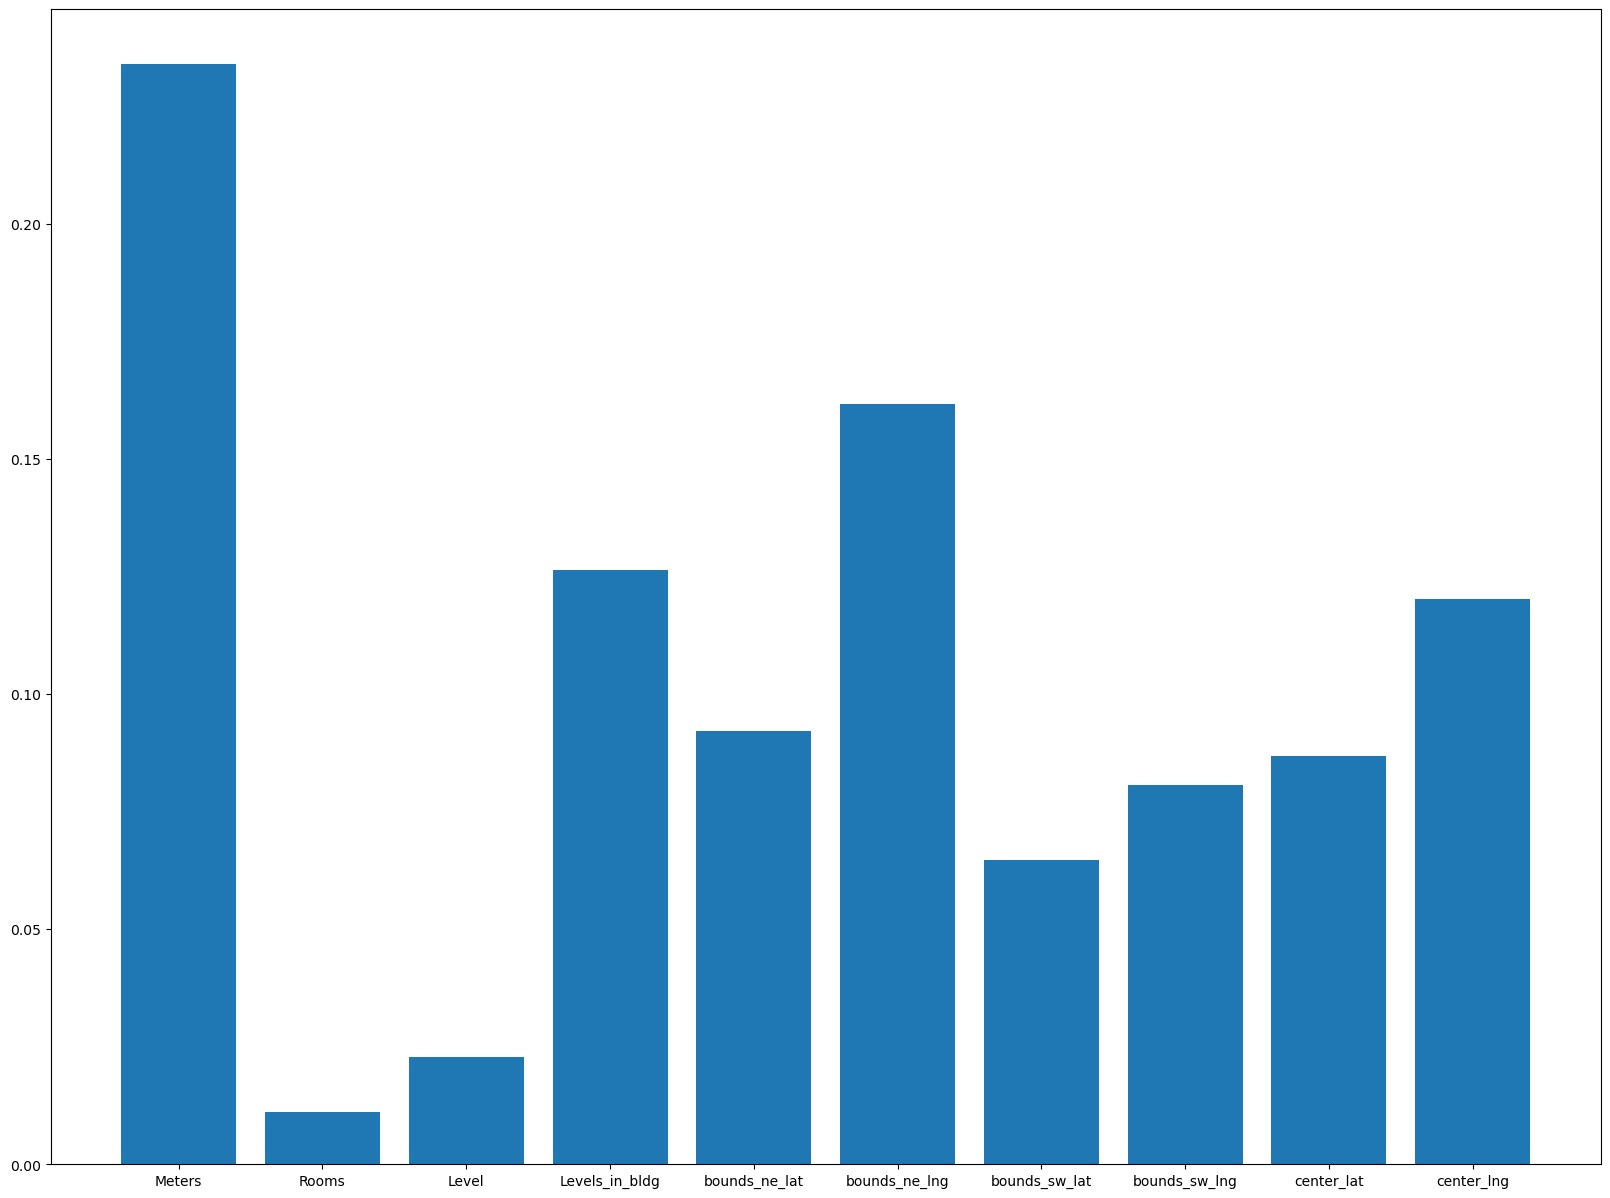

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.xlabel()
plt.bar(model.feature_names_in_, model.feature_importances_)

In [61]:
streets_data_to_save = pd.DataFrame.from_dict(all_inputs)
streets_data_to_save

,"Warszawa, Włochy, Łopuszańska","Warszawa, Bemowo, Powstańców Śląskich","Warszawa, Ursus, Edwarda Habicha","Warszawa, Bemowo, gen. Tadeusza Pełczyńskiego","Warszawa, Bemowo, Szlifierska","Warszawa, Bemowo, Karabeli","Warszawa, Bemowo, Jerzego Waldorffa","Warszawa, Bemowo, Synów Pułku","Warszawa, Włochy, 1 Sierpnia","Warszawa, Ursus, Konińska",...,"Warszawa, Bemowo, Antoniego Kocjana","Warszawa, Włochy, Mikołajska","Warszawa, Bemowo, Moździerzy","Warszawa, Bemowo, Lustrzana","Warszawa, Bemowo, Romualda Millera","Warszawa, Włochy, Rybnicka","Warszawa, Włochy, Dźwigowa","Warszawa, Włochy, Ignacego Prądzyńskiego","Warszawa, Włochy, Lechicka","Warszawa, Włochy, Notecka"
bounds_ne_lat,52.197915,52.269365,52.207000,52.245827,52.244620,52.232320,52.262711,52.225550,52.196420,52.195177,...,52.254066,52.210377,52.220614,52.223498,52.259287,52.212605,52.212901,52.224954,52.193394,52.212448
bounds_ne_lng,20.958876,20.933587,20.882900,20.913005,20.921568,20.902492,20.952604,20.921960,20.985498,20.896170,...,20.899236,20.934261,20.897222,20.906029,20.920687,20.910976,20.914532,20.970238,20.970287,20.906697
bounds_sw_lat,52.189157,52.219092,52.202049,52.241136,52.241876,52.227757,52.253292,52.222980,52.189767,52.193849,...,52.248797,52.203110,52.217768,52.217171,52.257635,52.202563,52.209122,52.223015,52.189689,52.211548
bounds_sw_lng,20.923734,20.906788,20.878161,20.897303,20.920617,20.896550,20.936848,20.916379,20.962705,20.892607,...,20.866895,20.926622,20.894597,20.902442,20.917830,20.902859,20.913250,20.959303,20.960673,20.897901
center_lat,52.193579,52.243817,52.204589,52.243441,52.243254,52.229798,52.258068,52.224295,52.193137,52.194587,...,52.251591,52.206645,52.219379,52.220562,52.258422,52.207930,52.211618,52.224044,52.192024,52.211977
center_lng,20.941161,20.912364,20.880754,20.907529,20.920978,20.899331,20.944514,20.919010,20.973743,20.894249,...,20.882801,20.929329,20.895502,20.904291,20.918509,20.905991,20.914165,20.964862,20.965181,20.902378


In [62]:
streets_data_to_save.to_csv(r"C:\...\flats_data_folder\streets_data.csv", sep=";")